# Modeling Graph

In [75]:
import networkx as nx
import pandas as pd
df = pd.read_csv("after-concepts.csv")

In [59]:
# Take only the first 200 rows and select specific columns
df = df.head(200)[['Subject', 'Relation', 'Object']]

In [78]:
df

,Number,Title,Description,Described In,Definition,sentence,kw_bert,Figures,synonyms,SynonymsKW,Subject,Relation,Object
0,11.2,Identify Risks,the process of identify individual project ris...,NaN,the process of identify individual project ris...,['the process of identify individual project r...,"['project risk', 'project risk document', 'pro...",PMBOOKimgs/figureNone.png,"['project risk', 'project risk common', 'proje...",[-1.00361414e-01 3.35380197e-01 1.59030974e-...,process,identify,individual project risk source
1,11.3,Perform Qualitative Risk Analysis,the process of prioritize individual project r...,NaN,the process of prioritize individual project r...,['the process of prioritize individual project...,"['project risk analysisor', 'project risk', 'i...",PMBOOKimgs/figureNone.png,NaN,[ 1.08589485e-01 3.29151183e-01 1.84150457e-...,process,prioritize,individual project risk
2,11.4,Perform Quantitative Risk Analysis,the process ofnumerically analyze the combine ...,NaN,the process ofnumerically analyze the combine ...,['the process ofnumerically analyze the combin...,"['identifiedindividual project risk', 'project...",PMBOOKimgs/figureNone.png,NaN,[-1.68618545e-01 3.41307163e-01 2.08855078e-...,process analyze,combine,effect
3,11.7,Monitor Risks,the process of monitor the implementation of a...,NaN,the process of monitor the implementation of a...,['the process of monitor the implementation of...,"['project risk process', 'project risk managem...",PMBOOKimgs/figurePMBOOKimgs/figure11-1.png.png,"['project risk management', 'project riskmanag...",[ 4.86373492e-02 3.42356235e-01 1.86675921e-...,they,overlap,interact way thatcannot
4,11.7,Monitor Risks,the process of monitor the implementation of a...,NaN,the process of monitor the implementation of a...,['the process of monitor the implementation of...,"['project risk process', 'project risk managem...",PMBOOKimgs/figurePMBOOKimgs/figure11-1.png.png,"['project risk management', 'project riskmanag...",[ 4.86373492e-02 3.42356235e-01 1.86675921e-...,pmboke guide.395ctionepifonotkey concept proje...,be,risky they
...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,11.7.3.4,PROJECT DOCUMENTS UPDATES,project document that may be update as a resul...,"4.1.3.2, 4.3.3.3, 4.4.3.1, 11.2.3.1, 11.2.3.2",project document that may be update as a resul...,['project document that may be update as a res...,"['projects risk register', 'risk process inclu...",PMBOOKimgs/figureNone.png,NaN,[-5.02593592e-02 3.71453166e-01 3.46995533e-...,s0 forth.risk report,..,new information become
721,11.7.3.4,PROJECT DOCUMENTS UPDATES,project document that may be update as a resul...,"4.1.3.2, 4.3.3.3, 4.4.3.1, 11.2.3.1, 11.2.3.2",project document that may be update as a resul...,['project document that may be update as a res...,"['projects risk register', 'risk process inclu...",PMBOOKimgs/figureNone.png,NaN,[-5.02593592e-02 3.71453166e-01 3.46995533e-...,available monitor risksprocess risk report,be,update reflect current status
722,11.7.3.4,PROJECT DOCUMENTS UPDATES,project document that may be update as a resul...,"4.1.3.2, 4.3.3.3, 4.4.3.1, 11.2.3.1, 11.2.3.2",project document that may be update as a resul...,['project document that may be update as a res...,"['projects risk register', 'risk process inclu...",PMBOOKimgs/figureNone.png,NaN,[-5.02593592e-02 3.71453166e-01 3.46995533e-...,major individual project risk,currentlevel,overall project risk risk report
723,11.7.3.4,PROJECT DOCUMENTS UPDATES,project document that may be update as a resul...,"4.1.3.2, 4.3.3.3, 4.4.3.1, 11.2.3.1, 11.2.3.2",project document that may be update as a resul...,['project document that may be update as a res...,"['projects risk register', 'risk process inclu...",PMBOOKimgs/figureNone.png,NaN,[-5.02593592e-02 3.71453166e-01 3.46995533e-...,it,may include,conclusion riskaudit effectiveness risk manage...


In [76]:
# Create a bidirectional graph from the subset of the DataFrame
G = nx.from_pandas_edgelist(df, 'Subject', 'Object', create_using=nx.DiGraph())


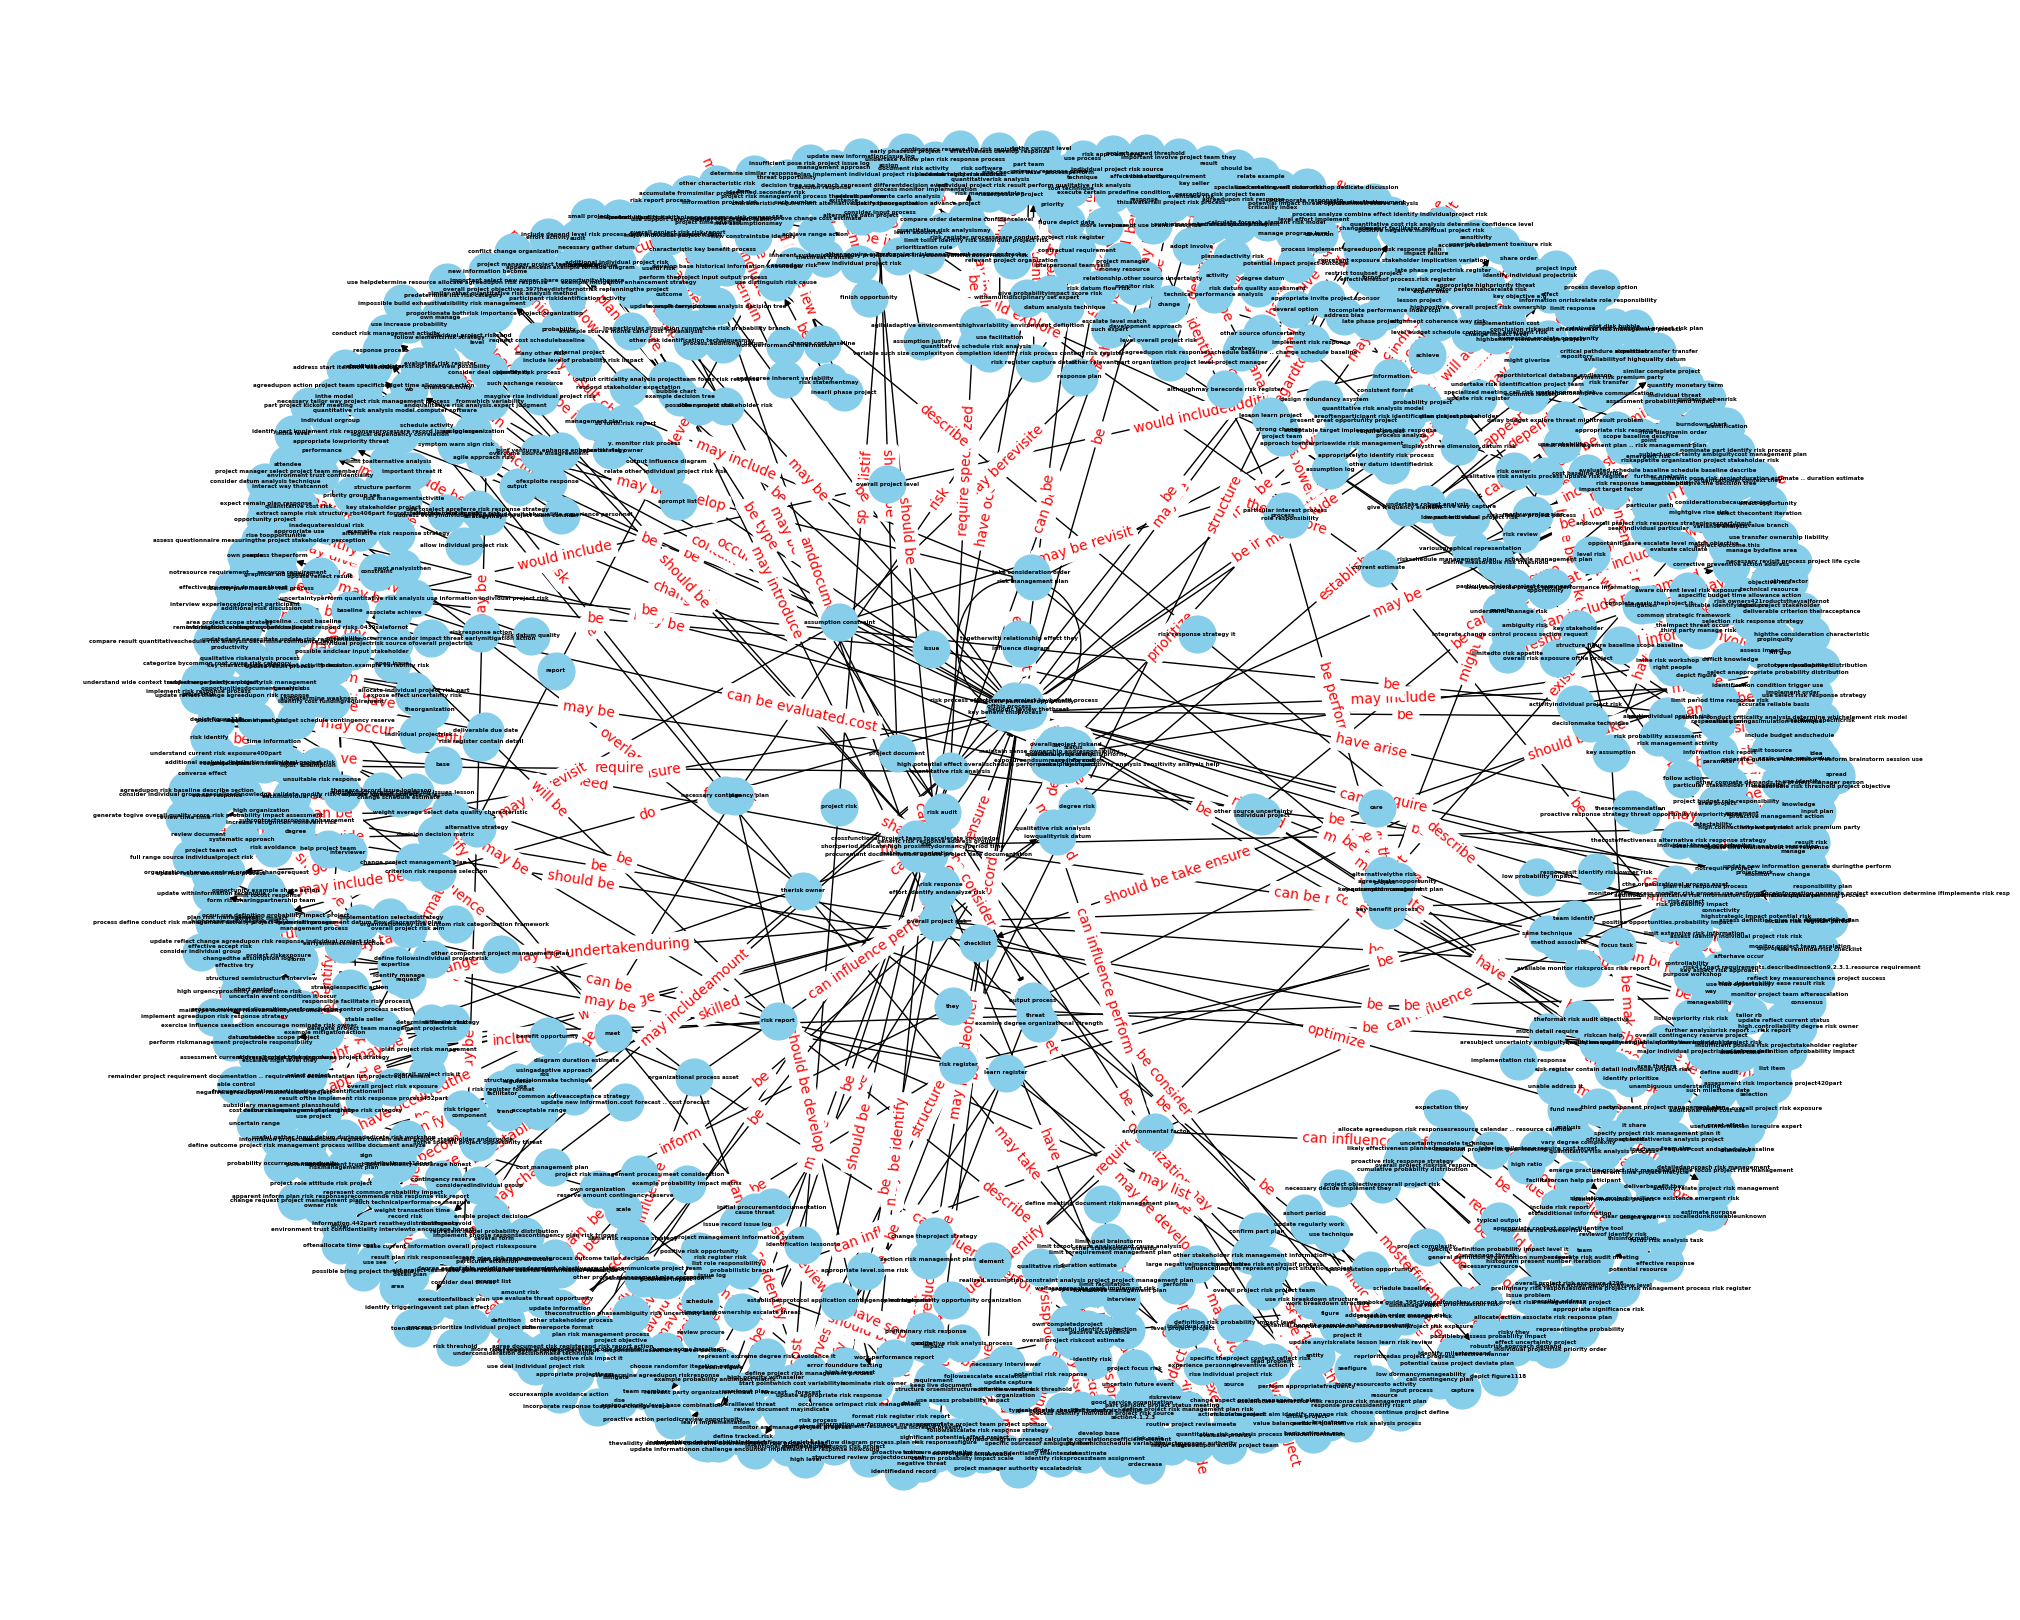

In [77]:
# Visualization (optional)
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G)  # or choose another layout
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=4)

# Draw edge labels from the "Relation" column
edge_labels = {}
for source, target in G.edges():
    matching_rows = df[(df['Subject'] == source) & (df['Object'] == target)]
    if not matching_rows.empty:
        edge_labels[(source, target)] = matching_rows['Relation'].iloc[0]

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.show()

# Visualize nodes

In [79]:
# Print node keys
print("Node dict keys: \n{}\n".format(G.nodes.data()))

# Print number of nodes
print("Number of nodes: \n{}\n".format(G.number_of_nodes()))

# Print number of edges
print("Number of edges: \n{}".format(G.number_of_edges()))


Node dict keys: 
[('process', {}), ('individual project risk source', {}), ('individual project risk', {}), ('process analyze', {}), ('effect', {}), ('they', {}), ('interact way thatcannot', {}), ('pmboke guide.395ctionepifonotkey concept project risk managementail project', {}), ('risky they', {}), ('vary degree complexity', {}), ('deliverbenefit they', {}), ('respond stakeholder expectation', {}), ('conflict change organization', {}), ('project risk', {}), ('intentional mannerin order', {}), ('value balance risk', {}), ('risk management aim identify manage risk', {}), ('unmanage risk', {}), ('potential cause project deviate plan', {}), ('level project project', {}), ('individual risk', {}), ('define followsindividual project risk', {}), ('uncertain event condition it occur', {}), ('project objectivesoverall project risk', {}), ('effect uncertainty project', {}), ('represent exposure stakeholder implication variation', {}), ('positive negative.individual project risk', {}), ('positive

In [80]:
import torch
# DO NOT CHANGE THIS CELL
# Print node degrees using NetworkX
print("Node degrees via NetworkX API: \n{}\n".format(dict(G.in_degree())))

node_degrees = dict(G.in_degree())

# Find the node with the highest in-degree
max_degree_node = max(node_degrees, key=node_degrees.get)
print("Node {} has the highest in-degree of {} connections.".format(max_degree_node, node_degrees[max_degree_node]))


Node degrees via NetworkX API: 
{'process': 1, 'individual project risk source': 3, 'individual project risk': 10, 'process analyze': 0, 'effect': 1, 'they': 0, 'interact way thatcannot': 1, 'pmboke guide.395ctionepifonotkey concept project risk managementail project': 0, 'risky they': 1, 'vary degree complexity': 0, 'deliverbenefit they': 1, 'respond stakeholder expectation': 0, 'conflict change organization': 1, 'project risk': 0, 'intentional mannerin order': 1, 'value balance risk': 0, 'risk management aim identify manage risk': 1, 'unmanage risk': 0, 'potential cause project deviate plan': 1, 'level project project': 0, 'individual risk': 2, 'define followsindividual project risk': 0, 'uncertain event condition it occur': 1, 'project objectivesoverall project risk': 0, 'effect uncertainty project': 1, 'represent exposure stakeholder implication variation': 0, 'positive negative.individual project risk': 1, 'positive risk opportunity': 0, 'mitigate': 1, 'unmanage threat': 0, 'issue